In [1]:
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline
import operator
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName,stitchMNISTSamples
from sklearn.feature_extraction.text import TfidfTransformer
#STORAGE FOR FINAL RESULT
result   = {}

In [2]:
from optvaemodels.vae import VAE
import optvaemodels.vae_learn as VAE_learn
import optvaemodels.vae_evaluate as VAE_evaluate
import optvaemodels.vae_learn as VAE_learn
import itertools,time
from utils.misc import readPickle

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN 4007)


In [3]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset as LDVAE

#DATA = 'binarized_mnist'
#DATA = '20newsgroups_miao'
#DATA = 'rcv2_miao'
DATA = 'wikipedia'

if DATA == 'binarized_mnist':
    dataset = loadDataset(DATA)
else:
    dataset = LDVAE(DATA)
print dataset.keys()
additional_attrs        = {}
tfidf                   = TfidfTransformer(norm=None)
tfidf.fit(dataset['train'])
#Get normalized idf vectors
additional_attrs['idf'] = tfidf.idf_

/data/ml2/rahul/opt-vae/optvaedatasets/wikipedia/wikipedia.h5  found
Using: /data/ml2/rahul/opt-vae/optvaedatasets/wikipedia/wikipedia.h5
['vocabulary', 'data_type', 'dim_observations', 'train', 'test', 'valid']


In [4]:
if '20newsgroups' in DATA:
    print 'news'
    EP    = '80'; pl    = 2
    rfile = '../../expt/results-sept6/chkpt-20newsgroups_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'
elif 'rcv2' in DATA:
    print 'rcv2'
    EP    = '400'; pl    = 2
    rfile = '../../expt/results-sept6/chkpt-rcv2_miao-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'
elif 'wikipedia' in DATA:
    print 'wiki'
    EP    = '100'; pl    = 2
    rfile = '../../expt/chkpt-wikipedia-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-'+str(pl)+'-ql-2-nl-relu-bs-500-ep-100-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01-itype-tfidfl20_01_-uid'
    print os.path.exists(rfile)
else:
    assert False,'Done'

wiki
False


In [5]:
suffix= '-EP'+EP+'-params.npz'
rfile+= suffix
pfile = rfile.split('uid')[0]+'uid-config.pkl'
params= readPickle(pfile)[0]
vae   = VAE(params, paramFile=pfile, reloadFile=rfile, additional_attrs = additional_attrs)

	<<Reloading Model>>
	<<Loading structure (../../expt/chkpt-wikipedia-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-100-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01-itype-tfidfl20_01_-uid-config.pkl) and model (../../expt/chkpt-wikipedia-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-100-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01-itype-tfidfl20_01_-uid-EP100-params.npz) / opt (../../expt/chkpt-wikipedia-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-100-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-100-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01-itype-tfidfl20_01_-uid-EP100-optParams.npz) weights>>
	<<Nparameters: 6611105>>
	<<Setting idf as theano shared variable>>

/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: iter_ctr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: anneal found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:198: UserWarning: lr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")



	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Evaluation: Setting opt_method: ADAM, 100 steps w/ 8e-3 lr>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>
	<<# additional updates: 0>>
	<<Modifying : [q_logcov_b,q_1_b,q_logcov_W,q_0_W,q_mu_W,q_1_W,q_0_b,q_mu_b]>>
	<<Inference with dropout :0.0001>>
	<<Done creating functions for training>>
	<<_buildModel took : 154.0779 seconds>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>


In [6]:
%load_ext autoreload
%autoreload 2
from optvaemodels.evaluate_vecs import evaluateWordVectors, modeJacobian ,evaluateConditionalWordVectors
from optvaemodels.evaluate_vecs import expectedJacobian,visualizePolysemousWords

In [7]:
#jacob  = modeJacobian(vae)
jacob  = expectedJacobian(vae,nsamples = 20)

Estimated  0  times


In [8]:
word_similarity, word_clusters = evaluateWordVectors(vae, jacob, dataset,n_clusters=20,metric='cosine')
for w in word_similarity:
    print w,word_similarity[w]
for idx in word_clusters:
    if len(word_clusters[idx].split(','))<500:
        print idx,word_clusters[idx]

israel ['israel', 'jerusalem', 'syria', 'arab', 'hebrew', 'turkey', 'jews']
weapon ['weapon', 'weapons', 'ammunition', 'attack', 'gun', 'enemy', 'guns']
book ['book', 'books', 'memoirs', 'writer', 'dearest', 'wrote', 'marrying']
companies ['companies', 'proprietary', 'company', 'revenue', 'manufacture', 'corporation', 'industry']
medical ['medical', 'physicians', 'physician', 'patients', 'surgeon', 'patient', 'treatment']
0 yellow,woods,lord,meadows,wooden,owes,provincial,shores,revolt,wine,wales,corridor,bitter,tree,dozen,victoria,mouth,grove,nineteenth,rice,admiral,country,union,eastern,rebellion,east,old,crown,inside,flood,honour,winter,edinburgh,natural,neighbourhood,siege,open,city,lawn,atlantic,salt,walking,residence,boat,plantation,west,canoes,overthrow,colony,stone,tropical,carved,hunting,sand,small,situated,plant,isle,castle,major,river,sea,fire,towns,sydney,australia,tribes,spring,palm,pale,occasional,land,iii,jurisdiction,garden,harbor,wheat,indian,bird,great,animals,rode,an

In [ ]:
results = evaluateConditionalWordVectors(vae, dataset,metric='cosine')

In [ ]:
for word in results:
    for context in results[word]:
        for itype in results[word][context]:
            if itype=='random':
                continue
            print 'Word: ',word,' Context: ',context,' Input: ',itype,' Similar Words: ',results[word][context][itype]

In [9]:
results_viz = visualizePolysemousWords(vae, dataset)
for w in results_viz:
    print w,results_viz[w].shape

Processing: fire
Word:  fire  Docs:  (90, 7702)
( 0 ) ( 10 ) ( 20 ) ( 30 ) ( 40 ) ( 50 ) ( 60 ) ( 70 ) ( 80 ) 

Processing: light
Word:  light  Docs:  (91, 7702)
( 0 ) ( 10 ) ( 20 ) ( 30 ) ( 40 ) ( 50 ) ( 60 ) ( 70 ) ( 80 ) ( 90 ) 

Processing: bar
Word:  bar  Docs:  (71, 7702)
( 0 ) ( 10 ) ( 20 ) ( 30 ) ( 40 ) ( 50 ) ( 60 ) ( 70 ) 

Processing: bank
Word:  bank  Docs:  (68, 7702)
( 0 ) ( 10 ) ( 20 ) ( 30 ) ( 40 ) ( 50 ) ( 60 ) 



In [17]:
from sklearn import manifold

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1])
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

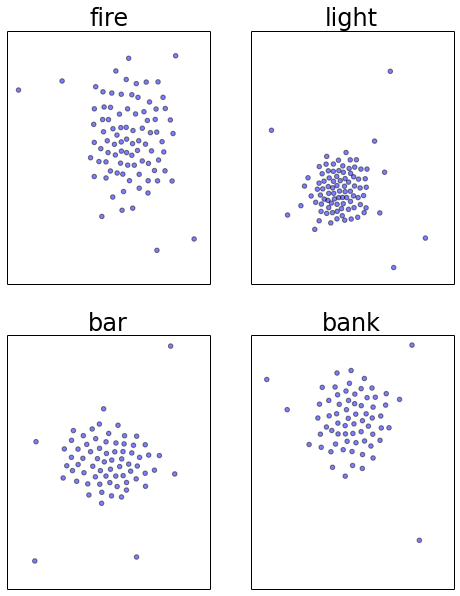

In [26]:
tsne_results = {}
fig,axlist = plt.subplots(2,len(results_viz)/2,figsize = (8,10))
for idx,word in enumerate(results_viz):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(results_viz[word])
    ax = axlist.ravel()[idx]
    ax.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(word)

In [9]:
dset1 = LDVAE('scws')
dset2 = LDVAE('wordsim353')
#vocab = dset['vocabulary']
vocab = [k.strip().split(' ')[0] for k in open('../../optvaedatasets/wikicorp/WestburyLab.wikicorp.201004.feat').readlines()]
if isinstance(vocab,np.ndarray):
    vocab = vocab.tolist()

vocab_data = set(vocab)
vocab_emb = set()
for k in dset1:
    vocab_emb.add(dset1[k]['w1'].lower().replace('-',''))
    vocab_emb.add(dset1[k]['w2'].lower().replace('-',''))
for k in dset2:
    vocab_emb.add(dset2[k]['w1'].lower().replace('-',''))
    vocab_emb.add(dset2[k]['w2'].lower().replace('-',''))

In [10]:
for k in vocab_emb:
    if k not in vocab_data:
        print k

under
even
call
ms
give
side
mine
interest
insufflate
down
still
first
take
show
get
sincere
being
y2k
fill
further
full
found
hundred
put
done
part
see
last
whole
due
fire
bill
back
up
move
out
keep
system
haven
have
computer
cd
five
about
